# Creating Our K Nearest Neighbors Algorithm

In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random

style.use('fivethirtyeight')

In [2]:
dataset = {'k':[[1, 2], [2, 3], [3, 1]], 'r':[[6,5], [7,7], [8, 6]]}
new_features = [5, 7]

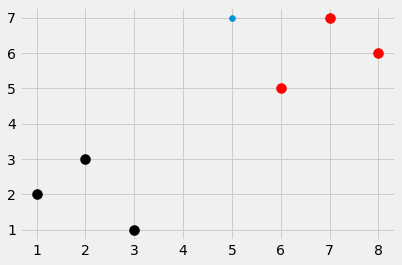

In [3]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1])
plt.show()   

In [4]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        """the k value should be more than number of classes."""
        warnings.warn('K is set  to a value less than total voting groups!')
    distances = list()
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances) [:k]]
    """
    most_common:
    List the n most common elements and their counts from the most common to the least.
    If n is None, then list all element counts.
    """
    # print(Counter(votes).most_common(1))
    # print(Counter(votes).most_common(1)[0])
    vote_result = Counter(votes).most_common(1)[0][0]
    """Counter(votes).most_common(1)[0][1] returns the number of most common value."""
    confidence = Counter(votes).most_common(1)[0][1]/k
    return vote_result, confidence

In [5]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

('r', 1.0)


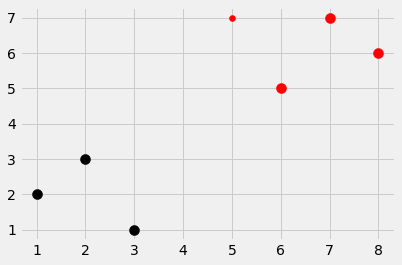

In [6]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color=result[0])
plt.show()

In [7]:
df = pd.read_csv("Data/breast-cancer-wisconsin.data")

df.replace('?', -99999, inplace=True)
"""id column is pretty useless. Also it ruins the KNN accuracy."""
df.drop(['id'], 1, inplace=True)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
"""
Some numbers in this data are char or string.
Everything in this dataframe ought to be int or float.
"""
full_data = df.astype(float).values.tolist()
full_data[:10]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]

In [9]:
"""random.shuffle replaces the original data."""
random.shuffle(full_data)
full_data[:10]

[[5.0, 10.0, 10.0, 9.0, 6.0, 10.0, 7.0, 10.0, 5.0, 4.0],
 [5.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 10.0, 10.0, 8.0, 6.0, 8.0, 7.0, 10.0, 1.0, 4.0],
 [5.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0]]

In [10]:
"""Preparing the Data"""
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

for i in train_data: 
    """
    i[-1] is the last column of dataset. It's 2 or 4.
    So the next line adds data of all the columns except the last one
    to the dictionary and sort them by 2 or 4.
    """
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [11]:
"""
Increasing the k value doesn't always increase the accuracy.
(For k=400 the accuracy is very awful.)
"""
correct = 0
total = 0
for group in test_set:
    """group is just 2 or 4.""" 
    # print(group)
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            """Printing incurrept votes confidence"""
            print(confidence)
        total += 1

print('Accuracy:', correct/total)

0.8
1.0
0.6
Accuracy: 0.9784172661870504


In [12]:
"""Preparing the Data"""
test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

for i in train_data: 
    """
    i[-1] is the last column of dataset. It's 2 or 4.
    So the next line adds data of all the columns except the last one
    to the dictionary and sort them by 2 or 4.
    """
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [13]:
"""
Increasing the k value doesn't always increase the accuracy.
(For k=400 the accuracy is very awful.)
"""
correct = 0
total = 0
for group in test_set:
    """group is just 2 or 4.""" 
    # print(group)
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            """Printing incurrept votes confidence"""
            print(confidence)
        total += 1

print('Accuracy:', correct/total)

0.8
0.8
0.8
0.8
1.0
0.8
0.6
1.0
0.6
0.8
Accuracy: 0.96415770609319


### Calculating Overall Accuracy

In [14]:
accuracies = list()

for i in range(25):
    df = pd.read_csv("Data/breast-cancer-wisconsin.data")

    df.replace('?', -99999, inplace=True)
    """id column is pretty useless. Also it ruins the KNN accuracy."""
    df.drop(['id'], 1, inplace=True) 
    full_data = df.astype(float).values.tolist()
    random.shuffle(full_data)
    """Preparing the Data"""
    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size * len(full_data))]
    test_data = full_data[-int(test_size * len(full_data)):]

    for i in train_data: 
        """
        i[-1] is the last column of dataset. It's 2 or 4.
        So the next line adds data of all the columns except the last one
        to the dictionary and sort them by 2 or 4.
        """
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])


    correct = 0
    total = 0
    for group in test_set:
        """group is just 2 or 4.""" 
        # print(group)
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct += 1
            # else:
            #     """Printing incurrept votes confidence"""
            #     print(confidence)
            total += 1

    # print('Accuracy:', correct/total)
    accuracies.append(correct/total)
    
print(sum(accuracies)/len(accuracies))

    